In [1]:
import sys
# sys.path.append('/root/6S062/indoor-loc/Workspace/')
import matplotlib.pyplot as plt
import json
import ibeaconsHelper
# import trilateration
import CoreLocation
import numpy as np

In [7]:
with open('/root/6S062/indoor-loc/Server/collected_data/cattalyya-13-slow-old/ibeacons/1526267744849.json', 'r') as f:
    data = json.load(f)
data_by_timestamp = ibeaconsHelper.get_rssi_data_by_timestamp(data)
A = -64
n = 2
conversion = 39.97 # meters to inches
subject_name = "cattalyya"
predicted_locations = CoreLocation.Locations(subject=subject_name)
for timestamp in data_by_timestamp.keys():
    rssi_values = ibeaconsHelper.get_rssi_values(data_by_timestamp, timestamp)
    beacon_distances = ibeaconsHelper.get_beacon_distances_from_rssi(rssi_values, A, n, conversion)
    predicted_loc = trilateration.trilaterate(beacon_locations, beacon_distances, L2=True)
    # TODO: check why None result from trilateration
    if predicted_loc is not None:
        predicted_locations.add_np_point(predicted_loc, timestamp)

# subject_point = CoreLocation.Point2D.numpy_to_point(client_locations[subject_name], None)
predicted_locations.visualize(ax_limits=axis_limits)
# plt.show()
# predicted_locations.plot(ax_limits=axis_limits)

NameError: name 'trilateration' is not defined

In [ ]:
for timestamp in data_by_timestamp.keys():
    rssi_values = ibeaconsHelper.get_rssi_values(data_by_timestamp, timestamp)
    print rssi_values
print(len(data_by_timestamp.keys()))

In [8]:
room = CoreLocation.Room.import_room_data('room_measurement.json', "G5-may13")

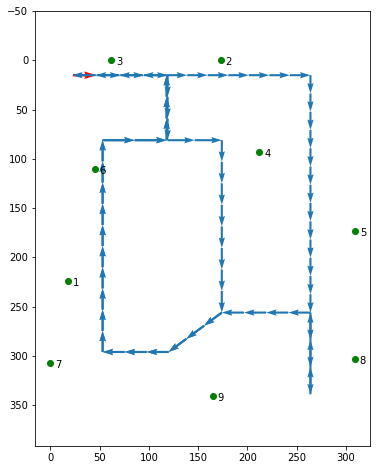

In [9]:
fig, ax = plt.subplots(figsize=(6,8))    
ax = room.step_landmarks.visualize(fig_ax=(fig, ax), downsample=1, first_arrow_color='red')
ax = room.beacons.plot(fig_ax=(fig, ax), show_point_label=True)
ax.axis('equal')
plt.gca().invert_yaxis()
plt.show()